# **Experiment 3**

## Context



This experiment is designed to train a KNeighborClassifier model to predict the probability that customers will purchase more than one vehicle. The objective is to enable targeted marketing strategies aimed at potential repeat buyers. Additionally, the performance of this model will be compared to that of an SVC model to assess which is more effective in this predictive task.

### 0. Import Packages

In [1]:
! pip install -r https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 32.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.1.1 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings

warnings.filterwarnings('ignore')

### 1. Load Dataset

In [4]:
from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [5]:
%cd /content/gdrive/MyDrive/ColabNotebooks/UTS_III/MLAA/MLAA_AT2/

/content/gdrive/MyDrive/ColabNotebooks/UTS_III/MLAA/MLAA_AT2


In [6]:
file_url = 'repurchase_dataset.csv'

In [7]:
df = pd.read_csv(file_url)

### 2. Explore Dataset

In [8]:
df.shape #Display number of rows and cols in data

(131337, 17)

In [9]:
df.info() #Display information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131337 entries, 0 to 131336
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         131337 non-null  int64 
 1   Target                     131337 non-null  int64 
 2   age_band                   18962 non-null   object
 3   gender                     62029 non-null   object
 4   car_model                  131337 non-null  object
 5   car_segment                131337 non-null  object
 6   age_of_vehicle_years       131337 non-null  int64 
 7   sched_serv_warr            131337 non-null  int64 
 8   non_sched_serv_warr        131337 non-null  int64 
 9   sched_serv_paid            131337 non-null  int64 
 10  non_sched_serv_paid        131337 non-null  int64 
 11  total_paid_services        131337 non-null  int64 
 12  total_services             131337 non-null  int64 
 13  mth_since_last_serv        131337 non-null  

In [10]:
df.describe() # Summary

,ID,Target,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
count,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000
mean,77097.384180,0.026809,5.493022,5.452500,5.472517,5.452287,5.497050,5.481692,5.454967,5.469807,5.502836,5.485438,5.480778
std,44501.636704,0.161525,2.843299,2.884328,2.870665,2.886528,2.878699,2.880408,2.875961,2.859756,2.854896,2.876772,2.867524
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,38563.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,77132.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,115668.000000,0.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,154139.000000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [11]:
df.head() #Display first 5 data

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
0,1,0,3. 35 to 44,Male,model_1,LCV,9,2,10,3,7,5,6,9,8,10,4
1,2,0,NaN,NaN,model_2,Small/Medium,6,10,3,10,4,9,10,6,10,7,10
2,3,0,NaN,Male,model_3,Large/SUV,9,10,9,10,9,10,10,7,10,6,10
3,5,0,NaN,NaN,model_3,Large/SUV,5,8,5,8,4,5,6,4,10,9,7
4,6,0,NaN,Female,model_2,Small/Medium,8,9,4,10,7,9,8,5,4,4,9


### 3. Explore Target variable

In [12]:
target = 'Target'

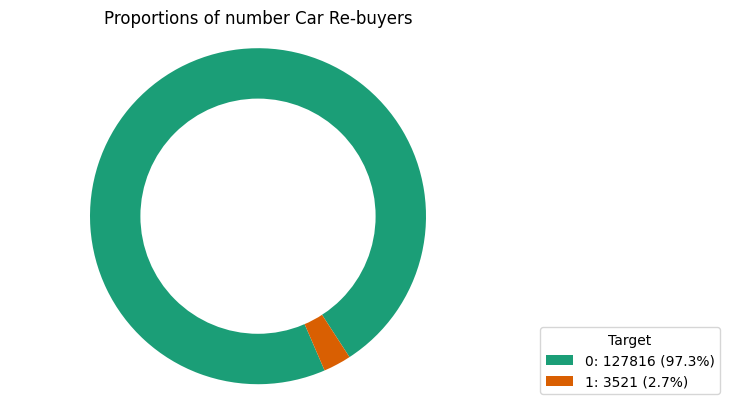

In [13]:
#Plot donut chart for distribution of Target data
df_label_count = df[target].value_counts()
wedges, texts = plt.pie(df_label_count.values, startangle=303, colors=plt.cm.Dark2(range(len(df_label_count))))
legend_labels = [f'{key}: {value} ({value/sum(df_label_count.values)*100:.1f}%)' for key, value in zip(df_label_count.index, df_label_count.values)]
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white')) # Create a white circle for the 'donut' effect
plt.legend(wedges, legend_labels, title=target, loc='lower center', bbox_to_anchor=(1, 0, 0.5, 1))
plt.title(f'Proportions of number Car Re-buyers')
plt.axis('equal')
plt.show()

### 4. Explore Variables of Interest

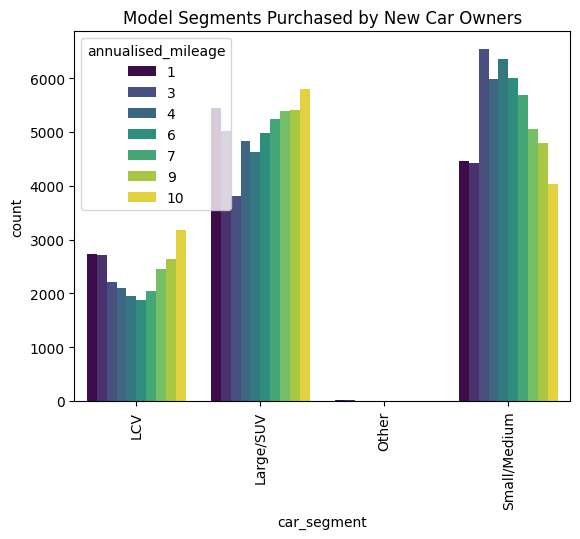

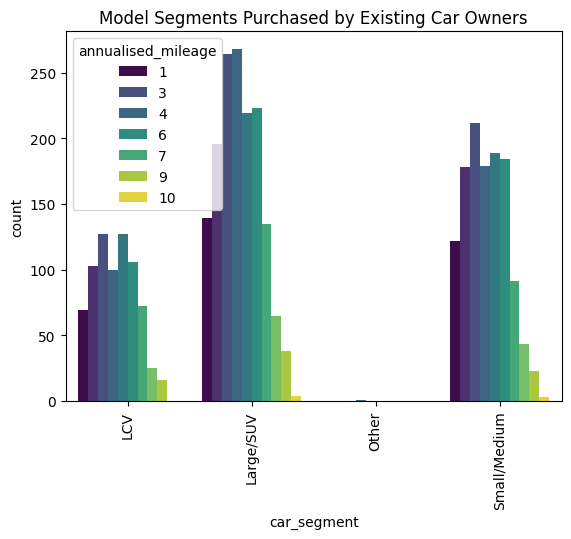

In [14]:
# Plot countplot to show relation between mileage, car owners
for i in [0,1]:
  temp_df= df[df['Target']==i]
  temp_sorted_df = temp_df.sort_values(by='car_segment')
  sns.countplot(temp_sorted_df, x='car_segment', hue='annualised_mileage', palette='viridis')
  if i==1:
    plt.title('Model Segments Purchased by Existing Car Owners')
  else:
    plt.title('Model Segments Purchased by New Car Owners')
  plt.xticks(rotation=90)
  plt.show()

In [15]:
# Display which car model lies in which segment
grouped_models = df.groupby('car_segment')['car_model'].unique()

for segment, models in grouped_models.items():
    print(f"{segment} segment models: {', '.join(models)}")

LCV segment models: model_1, model_7, model_9, model_16
Large/SUV segment models: model_3, model_5, model_8, model_10, model_13
Other segment models: model_17, model_19
Small/Medium segment models: model_2, model_6, model_4, model_11, model_12, model_14, model_15, model_17, model_18


In [16]:
cat_cols = ['gender', 'age_band', 'car_model', 'car_segment'] #List all categorical variables in data

In [17]:
#Display categorical columns and their unique values
for cols in cat_cols:
  print(cols)
  print(df[cols].unique())

gender
['Male' nan 'Female']
age_band
['3. 35 to 44' nan '1. <25' '4. 45 to 54' '2. 25 to 34' '7. 75+'
 '5. 55 to 64' '6. 65 to 74']
car_model
['model_1' 'model_2' 'model_3' 'model_5' 'model_6' 'model_4' 'model_7'
 'model_8' 'model_9' 'model_10' 'model_11' 'model_13' 'model_12'
 'model_14' 'model_15' 'model_16' 'model_17' 'model_18' 'model_19']
car_segment
['LCV' 'Small/Medium' 'Large/SUV' 'Other']


In [18]:
ord_cols = [x for x in df.columns if df[x].dtype=='int' and x not in ['ID', 'Target']] #Create a list of ordinal categorical values

### 5. Prepare Data

In [19]:
df_cleaned = df.copy()

In [20]:
# Dropping Identifier
df_cleaned.drop(['ID'], axis=1, inplace=True)

In [21]:
# Filling Missing values
df_cleaned.gender.fillna('Not Specified', inplace=True)
df_cleaned.age_band.fillna('Not Specified', inplace=True)

In [22]:
# Calculating duplicate values
df_cleaned.duplicated().sum()

2726

In [23]:
#Dropping all duplicate values
df_cleaned.drop_duplicates(inplace=True)

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Preprocessor to clean data
preprocessor = ColumnTransformer(
    transformers = [
        ('cat_col', OneHotEncoder(), cat_cols), #Encode the categorical variables
        ('ord_col', StandardScaler(), ord_cols) #Scaling ordinal variables
    ]
)

### 6. Split Dataset

In [25]:
y = df_cleaned.pop(target)
X = df_cleaned

In [26]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

X_data, X_test, y_data, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, stratify=y_data, random_state=42, test_size=0.2)

### 7. Baseline Model

In [27]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SVMSMOTE
from sklearn.svm import SVC

# pipeline for baseline model SVC
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('sampling', SVMSMOTE(random_state=42)),
    ('model', SVC(random_state=42))
])

In [28]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_col', OneHotEncoder(),
                                                  ['gender', 'age_band',
                                                   'car_model',
                                                   'car_segment']),
                                                 ('ord_col', StandardScaler(),
                                                  ['age_of_vehicle_years',
                                                   'sched_serv_warr',
                                                   'non_sched_serv_warr',
                                                   'sched_serv_paid',
                                                   'non_sched_serv_paid',
                                                   'total_paid_services',
                                                   'total_services',
                                                   'mth_since_last_serv',
                                                   'annualised_mileage',
                                                   'num_dealers_visited',
                                                   'num_serv_dealer_purchased'])])),
                ('sampling', SVMSMOTE(random_state=42)),
                ('model', SVC(random_state=42))])

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

# Measuring performance on train set
train_perf = classification_report(y_train, pipeline.predict(X_train))
val_perf = pipeline.score(X_val, y_val)
test_perf = pipeline.score(X_test, y_test)

In [31]:
# Display performance of SVC model
print(train_perf)
print(f"Validation Accuracy: {val_perf:.2%},\
      Test Accuracy: {test_perf:.2%}")

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     80056
           1       0.55      0.94      0.69      2254

    accuracy                           0.98     82310
   macro avg       0.77      0.96      0.84     82310
weighted avg       0.99      0.98      0.98     82310

Validation Accuracy: 97.55%,      Test Accuracy: 97.52%


### 8. Train Machine Learning Model

In [32]:
from sklearn.neighbors import KNeighborsClassifier

# KNeigh K-5 model
model = Pipeline([
    ('preprocessing', preprocessor),
    ('model', KNeighborsClassifier(n_neighbors=5))
])

In [33]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat_col', OneHotEncoder(),
                                                  ['gender', 'age_band',
                                                   'car_model',
                                                   'car_segment']),
                                                 ('ord_col', StandardScaler(),
                                                  ['age_of_vehicle_years',
                                                   'sched_serv_warr',
                                                   'non_sched_serv_warr',
                                                   'sched_serv_paid',
                                                   'non_sched_serv_paid',
                                                   'total_paid_services',
                                                   'total_services',
                                                   'mth_since_last_serv',
                                                   'annualised_mileage',
                                                   'num_dealers_visited',
                                                   'num_serv_dealer_purchased'])])),
                ('model', KNeighborsClassifier())])

### 9. Access Model Performance

In [34]:
y_preds = model.predict(X_train)

In [35]:
print(classification_report(y_train, y_preds))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     80056
           1       0.95      0.59      0.73      2254

    accuracy                           0.99     82310
   macro avg       0.97      0.80      0.86     82310
weighted avg       0.99      0.99      0.99     82310



In [36]:
print(f"Validation Accuracy: {model.score(X_val, y_val):.2%}%,\
      Test Accuracy: {model.score(X_test, y_test):.2%}%")

Validation Accuracy: 98.39%%,      Test Accuracy: 98.54%%


In [37]:
# KNeigh. K-10 model
model_2 = Pipeline([
    ('preprocessing', preprocessor),
    ('model', KNeighborsClassifier(n_neighbors=10))
])

In [38]:
model_2.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat_col', OneHotEncoder(),
                                                  ['gender', 'age_band',
                                                   'car_model',
                                                   'car_segment']),
                                                 ('ord_col', StandardScaler(),
                                                  ['age_of_vehicle_years',
                                                   'sched_serv_warr',
                                                   'non_sched_serv_warr',
                                                   'sched_serv_paid',
                                                   'non_sched_serv_paid',
                                                   'total_paid_services',
                                                   'total_services',
                                                   'mth_since_last_serv',
                                                   'annualised_mileage',
                                                   'num_dealers_visited',
                                                   'num_serv_dealer_purchased'])])),
                ('model', KNeighborsClassifier(n_neighbors=10))])

In [39]:
# Display K-10 performance on train data
print(classification_report(y_train, model_2.predict(X_train)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     80056
           1       0.96      0.44      0.60      2254

    accuracy                           0.98     82310
   macro avg       0.97      0.72      0.80     82310
weighted avg       0.98      0.98      0.98     82310



In [40]:
# Display K-10 performance on unseen data
print(f"Validation Accuracy: {model_2.score(X_val, y_val):.2%},\
      Test Accuracy: {model_2.score(X_test, y_test):.2%}")

Validation Accuracy: 98.22%,      Test Accuracy: 98.32%


In [41]:
# KNeigh. K-20 model
model_3 = Pipeline([
    ('preprocessing', preprocessor),
    ('model', KNeighborsClassifier(n_neighbors=20))
])

In [42]:
model_3.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat_col', OneHotEncoder(),
                                                  ['gender', 'age_band',
                                                   'car_model',
                                                   'car_segment']),
                                                 ('ord_col', StandardScaler(),
                                                  ['age_of_vehicle_years',
                                                   'sched_serv_warr',
                                                   'non_sched_serv_warr',
                                                   'sched_serv_paid',
                                                   'non_sched_serv_paid',
                                                   'total_paid_services',
                                                   'total_services',
                                                   'mth_since_last_serv',
                                                   'annualised_mileage',
                                                   'num_dealers_visited',
                                                   'num_serv_dealer_purchased'])])),
                ('model', KNeighborsClassifier(n_neighbors=20))])

In [44]:
# Display K-20 performance on train data
print(classification_report(y_train, model_3.predict(X_train)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     80056
           1       0.97      0.36      0.52      2254

    accuracy                           0.98     82310
   macro avg       0.97      0.68      0.76     82310
weighted avg       0.98      0.98      0.98     82310



In [43]:
print(f"Validation Accuracy: {model_3.score(X_val, y_val):.2%},\
      Test Accuracy: {model_3.score(X_test, y_test):.2%}")

Validation Accuracy: 98.14%,      Test Accuracy: 98.14%


In [45]:
# KNeigh. K-30 model
model_4 = Pipeline([
    ('preprocessing', preprocessor),
    ('model', KNeighborsClassifier(n_neighbors=30))
])

In [46]:
model_4.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat_col', OneHotEncoder(),
                                                  ['gender', 'age_band',
                                                   'car_model',
                                                   'car_segment']),
                                                 ('ord_col', StandardScaler(),
                                                  ['age_of_vehicle_years',
                                                   'sched_serv_warr',
                                                   'non_sched_serv_warr',
                                                   'sched_serv_paid',
                                                   'non_sched_serv_paid',
                                                   'total_paid_services',
                                                   'total_services',
                                                   'mth_since_last_serv',
                                                   'annualised_mileage',
                                                   'num_dealers_visited',
                                                   'num_serv_dealer_purchased'])])),
                ('model', KNeighborsClassifier(n_neighbors=30))])

In [47]:
# Display K-30 performance on train data
print(classification_report(y_train, model_4.predict(X_train)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     80056
           1       0.96      0.29      0.45      2254

    accuracy                           0.98     82310
   macro avg       0.97      0.65      0.72     82310
weighted avg       0.98      0.98      0.98     82310



In [48]:
print(f"Validation Accuracy: {model_4.score(X_val, y_val):.2%},\
      Test Accuracy: {model_4.score(X_test, y_test):.2%}")

Validation Accuracy: 98.01%,      Test Accuracy: 98.01%


In [49]:
# KNeigh. K-50 model
model_5 = Pipeline([
    ('preprocessing', preprocessor),
    ('model', KNeighborsClassifier(n_neighbors=50))
])

In [50]:
model_5.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat_col', OneHotEncoder(),
                                                  ['gender', 'age_band',
                                                   'car_model',
                                                   'car_segment']),
                                                 ('ord_col', StandardScaler(),
                                                  ['age_of_vehicle_years',
                                                   'sched_serv_warr',
                                                   'non_sched_serv_warr',
                                                   'sched_serv_paid',
                                                   'non_sched_serv_paid',
                                                   'total_paid_services',
                                                   'total_services',
                                                   'mth_since_last_serv',
                                                   'annualised_mileage',
                                                   'num_dealers_visited',
                                                   'num_serv_dealer_purchased'])])),
                ('model', KNeighborsClassifier(n_neighbors=50))])

In [51]:
# Display K-50 performance on train data
print(classification_report(y_train, model_5.predict(X_train)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     80056
           1       0.96      0.23      0.37      2254

    accuracy                           0.98     82310
   macro avg       0.97      0.61      0.68     82310
weighted avg       0.98      0.98      0.97     82310



In [52]:
print(f"Validation Accuracy: {model_5.score(X_val, y_val):.2%},\
      Test Accuracy: {model_5.score(X_test, y_test):.2%}")

Validation Accuracy: 97.83%,      Test Accuracy: 97.86%


In [53]:
from sklearn.metrics import PrecisionRecallDisplay, roc_curve, roc_auc_score

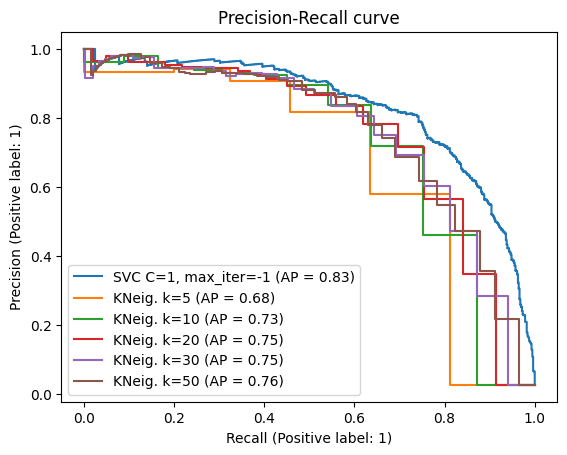

In [54]:
# Plot Precision-Recall Curve
display = PrecisionRecallDisplay.from_estimator(pipeline, X_val, y_val, name='SVC C=1, max_iter=-1')
display1 = PrecisionRecallDisplay.from_estimator(model, X_val, y_val, ax=display.ax_, name='KNeig. k=5')
display2 = PrecisionRecallDisplay.from_estimator(model_2, X_val, y_val, ax=display.ax_, name='KNeig. k=10')
display3 = PrecisionRecallDisplay.from_estimator(model_3, X_val, y_val, ax=display.ax_, name='KNeig. k=20')
display4 = PrecisionRecallDisplay.from_estimator(model_4, X_val, y_val, ax=display.ax_, name='KNeig. k=30')
display5 = PrecisionRecallDisplay.from_estimator(model_5, X_val, y_val, ax=display.ax_, name='KNeig. k=50')
display.ax_.set_title('Precision-Recall curve')
plt.show()

In [55]:
# probabilities for each model
y_probs = pipeline.decision_function(X_test)
y_probs1 = model.predict_proba(X_test)[:, 1]
y_probs2 = model_2.predict_proba(X_test)[:, 1]
y_probs3 = model_3.predict_proba(X_test)[:, 1]
y_probs4 = model_4.predict_proba(X_test)[:, 1]
y_probs5 = model_5.predict_proba(X_test)[:, 1]

In [56]:
# ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_probs1)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_probs2)
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_probs3)
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_probs4)
fpr5, tpr5, thresholds5 = roc_curve(y_test, y_probs5)

In [57]:
# AUC scores
auc = roc_auc_score(y_test, y_probs)
auc1 = roc_auc_score(y_test, y_probs1)
auc2 = roc_auc_score(y_test, y_probs2)
auc3 = roc_auc_score(y_test, y_probs3)
auc4 = roc_auc_score(y_test, y_probs4)
auc5 = roc_auc_score(y_test, y_probs5)

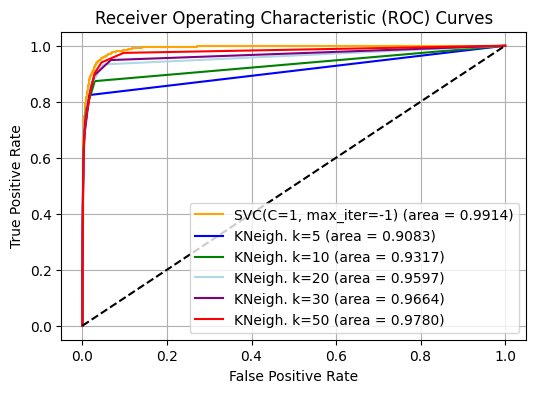

In [58]:
# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='orange', label=f'SVC(C=1, max_iter=-1) (area = {auc:.4f})')
plt.plot(fpr1, tpr1, color='blue', label=f'KNeigh. k=5 (area = {auc1:.4f})')
plt.plot(fpr2, tpr2, color='green', label=f'KNeigh. k=10 (area = {auc2:.4f})')
plt.plot(fpr3, tpr3, color='lightblue', label=f'KNeigh. k=20 (area = {auc3:.4f})')
plt.plot(fpr4, tpr4, color='purple', label=f'KNeigh. k=30 (area = {auc4:.4f})')
plt.plot(fpr5, tpr5, color='red', label=f'KNeigh. k=50 (area = {auc5:.4f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

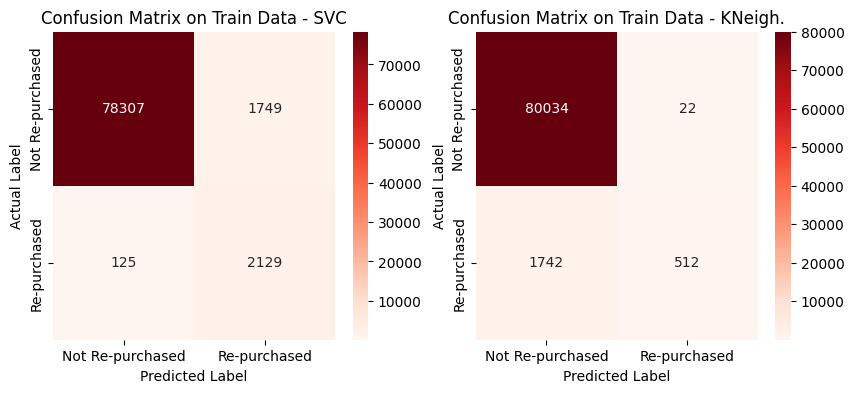

In [71]:
# Comparison plot for confusion matrix on Train set
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# SVC model
sns.heatmap(
    confusion_matrix(y_train, pipeline.predict(X_train)),
    annot=True,
    fmt="d",
    cmap="Reds",
    xticklabels=["Not Re-purchased", "Re-purchased"],
    yticklabels=["Not Re-purchased", "Re-purchased"],
    ax=axes[0]
)
axes[0].set_ylabel('Actual Label')
axes[0].set_xlabel('Predicted Label')
axes[0].set_title('Confusion Matrix on Train Data - SVC')

# K-50 model
sns.heatmap(
    confusion_matrix(y_train, model_5.predict(X_train)),
    annot=True,
    fmt="d",
    cmap="Reds",
    xticklabels=["Not Re-purchased", "Re-purchased"],
    yticklabels=["Not Re-purchased", "Re-purchased"],
    ax=axes[1]
)
axes[1].set_ylabel('Actual Label')
axes[1].set_xlabel('Predicted Label')
axes[1].set_title('Confusion Matrix on Train Data - KNeigh.')
plt.show()

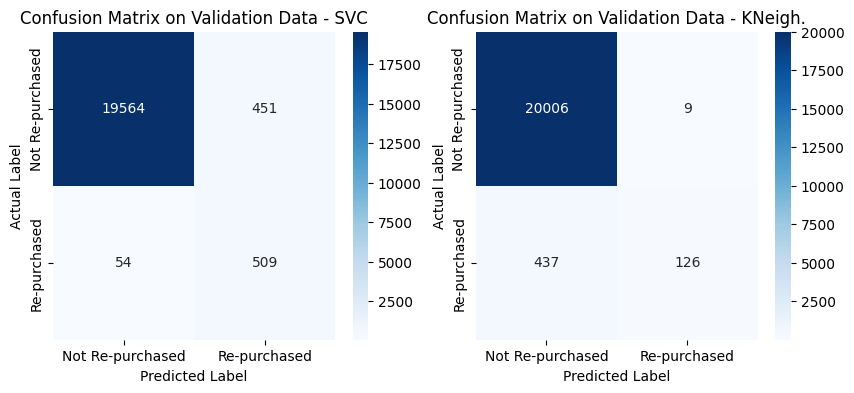

In [69]:
# Comparison plot for confusion matrix on Validation set
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# SVC model
sns.heatmap(
    confusion_matrix(y_val, pipeline.predict(X_val)),
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Not Re-purchased", "Re-purchased"],
    yticklabels=["Not Re-purchased", "Re-purchased"],
    ax=axes[0]
)
axes[0].set_ylabel('Actual Label')
axes[0].set_xlabel('Predicted Label')
axes[0].set_title('Confusion Matrix on Validation Data - SVC')

# K-50 model
sns.heatmap(
    confusion_matrix(y_val, model_5.predict(X_val)),
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Not Re-purchased", "Re-purchased"],
    yticklabels=["Not Re-purchased", "Re-purchased"],
    ax=axes[1]
)
axes[1].set_ylabel('Actual Label')
axes[1].set_xlabel('Predicted Label')
axes[1].set_title('Confusion Matrix on Validation Data - KNeigh.')
plt.show()

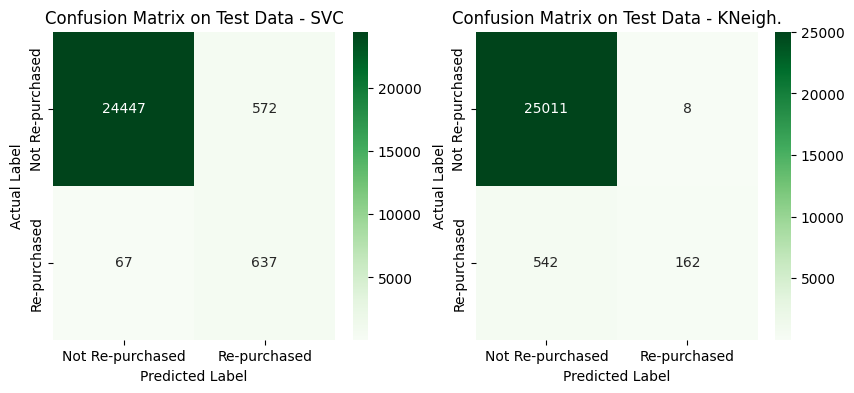

In [70]:
# Comparison plot for confusion matrix on test set
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# SVC model
sns.heatmap(
    confusion_matrix(y_test, pipeline.predict(X_test)),
    annot=True,
    fmt="d",
    cmap="Greens",
    xticklabels=["Not Re-purchased", "Re-purchased"],
    yticklabels=["Not Re-purchased", "Re-purchased"],
    ax=axes[0]
)
axes[0].set_ylabel('Actual Label')
axes[0].set_xlabel('Predicted Label')
axes[0].set_title('Confusion Matrix on Test Data - SVC')

# K-50 model
sns.heatmap(
    confusion_matrix(y_test, model_5.predict(X_test)),
    annot=True,
    fmt="d",
    cmap="Greens",
    xticklabels=["Not Re-purchased", "Re-purchased"],
    yticklabels=["Not Re-purchased", "Re-purchased"],
    ax=axes[1]
)
axes[1].set_ylabel('Actual Label')
axes[1].set_xlabel('Predicted Label')
axes[1].set_title('Confusion Matrix on Test Data - KNeigh.')
plt.show()